In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

In [2]:
# read in the weekly data we created
ppe_crunched = pd.read_csv("ppe_crunched_03_02_2021.csv")

In [3]:
# examine what sort of clean up job is required
ppe_crunched.loc[ppe_crunched["week number"] == 12]

,county,week,week number,Face Shields (Disposable),Surgical Masks,Cloth Masks,Surgical or Examination Gowns,Examination Gloves,N-95 Respirators,Hand Sanitizers,...,Lab Supplies,Beds/Cots,Body Bags,Lab Kit,Ventilators,Personnel,Sample Collecting Kits,Lab Platform,Bedding Accessories,Fit Testing Supplies
638,['Kern'],2020-08-29 to 2020-09-04,12,[3072748.0],[26597200.0],[5419900.0],[4450040.0],[4305000.0],[10193918.0],[6792091.0],...,[0.0],[0.0],[0.0],[0.0],[0.0],[1379.0],[0.0],[0.0],[0.0],[0.0]
639,['Mariposa'],2020-08-29 to 2020-09-04,12,[20440.0],[865200.0],[31500.0],[11592.0],[987000.0],[80640.0],[77252.0],...,[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0]
640,['Merced'],2020-08-29 to 2020-09-04,12,[812892.0],[10196400.0],[998360.0],[1412550.0],[7477000.0],[2482760.0],[95510.0],...,[0.0],[0.0],[3430.0],[0.0],[0.0],[0.0],[147500.0],[0.0],[0.0],[0.0]
641,['Mono'],2020-08-29 to 2020-09-04,12,[28284.0],[829400.0],[36500.0],[65058.0],[1281500.0],[315140.0],[71070.0],...,[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0]
642,['Napa'],2020-08-29 to 2020-09-04,12,[183964.0],[4005000.0],[939780.0],[645680.0],[27107000.0],[1348028.0],[1255298.0],...,[0.0],[0.0],[0.0],[0.0],[0.0],[35.0],[44800.0],[0.0],[0.0],[0.0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199,['Sonoma'],2021-02-20 to 2021-02-26,12,[812000.0],[16958200.0],[3450720.0],[740320.0],[5986400.0],[6258700.0],[395598.0],...,[0.0],[0.0],[0.0],[0.0],[0.0],[1827.0],[890400.0],[0.0],[0.0],[70.0]
2200,['Mono'],2021-02-20 to 2021-02-26,12,[43876.0],[969800.0],[72100.0],[65058.0],[1627500.0],[395500.0],[85022.0],...,[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0]
2201,['Lassen'],2021-02-20 to 2021-02-26,12,[30184.0],[3342800.0],[195699.0],[55370.0],[420000.0],[2919000.0],[62580.0],...,[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[36400.0],[0.0],[0.0],[0.0]
2202,['El Dorado'],2021-02-20 to 2021-02-26,12,[129696.0],[3534400.0],[836500.0],[206220.0],[9198000.0],[306180.0],[106036.0],...,[0.0],[0.0],[0.0],[0.0],[0.0],[168.0],[102900.0],[0.0],[0.0],[0.0]


In [4]:
# remove missing data
ppe_crunched = ppe_crunched.loc[(ppe_crunched['week'] != '2020-11-28 to 2020-12-04') & (ppe_crunched['week'] != '2021-02-20 to 2021-02-26')]

In [5]:
# columns with brackets are strings
ppe_crunched.dtypes

county                           object
week                             object
week number                       int64
Face Shields (Disposable)        object
Surgical Masks                   object
Cloth Masks                      object
Surgical or Examination Gowns    object
Examination Gloves               object
N-95 Respirators                 object
Hand Sanitizers                  object
Wipes                            object
Other / None of the above        object
Cleaning Supplies                object
Swabs                            object
Viral Testing Media              object
Pharmaceuticals                  object
Shoe Covers                      object
Test Kits                        object
KN95 Respirators                 object
Coveralls (Hospitals or EMS)     object
Medical Equipment                object
Goggles                          object
Lab Supplies                     object
Beds/Cots                        object
Body Bags                        object


In [6]:
# fix county with string replace
ppe_crunched["county"] = ppe_crunched["county"].str.replace("[", "")
ppe_crunched["county"] = ppe_crunched["county"].str.replace("]", "")
ppe_crunched["county"] = ppe_crunched["county"].str.replace("'", "")
print(ppe_crunched["county"].unique())

['Kern' 'Mariposa' 'Merced' 'Mono' 'Napa' 'Santa Barbara' 'Sutter' 'Modoc'
 'Del Norte' 'Placer' 'Trinity' 'Sacramento' 'San Benito' 'Yuba' 'Ventura'
 'Sonoma' 'San Joaquin' 'Alameda' 'Monterey' 'Solano' 'San Francisco'
 'Stanislaus' 'Orange' 'Nevada' 'San Luis Obispo' 'Lassen' 'Imperial'
 'San Bernardino' 'Santa Clara' 'San Diego' 'Humboldt' 'Tulare'
 'Los Angeles' 'Mendocino' 'Kings' 'Madera' 'Contra Costa' 'Siskiyou'
 'Inyo' 'San Mateo' 'Calaveras' 'Santa Cruz' 'Yolo' 'Marin' 'Riverside'
 'Colusa' 'Shasta' 'Alpine' 'Lake' 'Fresno' 'Amador' 'Tuolumne'
 'El Dorado' 'Glenn' 'Tehama' 'Butte' 'Plumas' 'Sierra']


In [7]:
# read in ppe info from ca open data portal, grab a list of products for our remaining columns with []
ppe_check = pd.read_csv("../../datasets_large/COVID-19_PPE_Logistics/logistics_ppe_original.csv")
ppe_check = ppe_check.dropna(subset=["quantity_filled", "county", "product_family"])

In [8]:
# create list of product families
ppe_check = ppe_check.sort_values("as_of_date")
ppe_check = ppe_check.loc[ (ppe_check["county"] != "Non-Governmental Entity") & (ppe_check["county"] != "Governmental Entity") & (ppe_check["county"] != "State Agency") & (ppe_check["county"] != "Tribal") & (ppe_check["county"] != "State Agency or Other") & (ppe_check["county"] != "Unassigned") & (ppe_check["county"] != "Other") & (ppe_check["as_of_date"] != "2020-06-08") & (ppe_check["as_of_date"] != "2020-06-09")]
product_list = ppe_check["product_family"].unique().tolist()
print(product_list)
print(len(product_list))

['Face Shields (Disposable)', 'Surgical Masks', 'Cloth Masks', 'Surgical or Examination Gowns', 'Examination Gloves', 'N-95 Respirators', 'Hand Sanitizers', 'Wipes', 'Other / None of the above', 'Cleaning Supplies', 'Swabs', 'Viral Testing Media', 'Pharmaceuticals', 'Shoe Covers', 'Test Kits', 'KN95 Respirators', 'Coveralls (Hospitals or EMS)', 'Medical Equipment', 'Goggles', 'Lab Supplies', 'Beds/Cots', 'Body Bags', 'Lab Kit', 'Ventilators', 'Personnel', 'Sample Collecting Kits', 'Lab Platform', 'Bedding Accessories', 'Fit Testing Supplies']
29


In [9]:
# iterate through product list and string replace each remaining column left to clean
for product in product_list:
    ppe_crunched[product] = ppe_crunched[product].str.replace("[", "")
    ppe_crunched[product] = ppe_crunched[product].str.replace("]", "")

In [10]:
# check our results
ppe_crunched

,county,week,week number,Face Shields (Disposable),Surgical Masks,Cloth Masks,Surgical or Examination Gowns,Examination Gloves,N-95 Respirators,Hand Sanitizers,...,Lab Supplies,Beds/Cots,Body Bags,Lab Kit,Ventilators,Personnel,Sample Collecting Kits,Lab Platform,Bedding Accessories,Fit Testing Supplies
0,Kern,2020-06-10 to 2020-06-16,1,1656500.0,2282000.0,3673500.0,2143190.0,1161000.0,3658718.0,5707127.0,...,0.0,0.0,0.0,0.0,0.0,539.0,0.0,0.0,0.0,0.0
1,Mariposa,2020-06-10 to 2020-06-16,1,840.0,568000.0,0.0,11592.0,0.0,1680.0,32928.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Merced,2020-06-10 to 2020-06-16,1,63480.0,2894000.0,19000.0,802550.0,2072000.0,246960.0,1890.0,...,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mono,2020-06-10 to 2020-06-16,1,5900.0,461000.0,20500.0,19558.0,381500.0,308420.0,30622.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Napa,2020-06-10 to 2020-06-16,1,78344.0,774000.0,612000.0,172480.0,660000.0,820628.0,1019012.0,...,0.0,0.0,0.0,0.0,0.0,0.0,36400.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,Sonoma,2021-02-13 to 2021-02-19,11,812000.0,16520800.0,2970000.0,740320.0,5986400.0,6258700.0,395598.0,...,0.0,0.0,0.0,0.0,0.0,1827.0,890400.0,0.0,0.0,70.0
2142,Mono,2021-02-13 to 2021-02-19,11,43876.0,958000.0,61300.0,65058.0,1627500.0,395500.0,85022.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2143,Lassen,2021-02-13 to 2021-02-19,11,30184.0,3308400.0,170157.0,55370.0,420000.0,2919000.0,62580.0,...,0.0,0.0,0.0,0.0,0.0,0.0,36400.0,0.0,0.0,0.0
2144,El Dorado,2021-02-13 to 2021-02-19,11,128896.0,3299800.0,568540.0,205820.0,9178000.0,290820.0,104036.0,...,0.0,0.0,0.0,0.0,0.0,168.0,102900.0,0.0,0.0,0.0


In [11]:
# replace nan values in dataframe with zeroes, for entire dataframe
ppe_crunched = ppe_crunched.fillna(0)

In [12]:
# formatting
for product in product_list:
    ppe_crunched[product] = ppe_crunched[product].astype(float)
    # ppe_crunched[product] = ppe_crunched[product].map("{:,}".format)

In [13]:
ppe_crunched

,county,week,week number,Face Shields (Disposable),Surgical Masks,Cloth Masks,Surgical or Examination Gowns,Examination Gloves,N-95 Respirators,Hand Sanitizers,...,Lab Supplies,Beds/Cots,Body Bags,Lab Kit,Ventilators,Personnel,Sample Collecting Kits,Lab Platform,Bedding Accessories,Fit Testing Supplies
0,Kern,2020-06-10 to 2020-06-16,1,1656500.0,2282000.0,3673500.0,2143190.0,1161000.0,3658718.0,5707127.0,...,0.0,0.0,0.0,0.0,0.0,539.0,0.0,0.0,0.0,0.0
1,Mariposa,2020-06-10 to 2020-06-16,1,840.0,568000.0,0.0,11592.0,0.0,1680.0,32928.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Merced,2020-06-10 to 2020-06-16,1,63480.0,2894000.0,19000.0,802550.0,2072000.0,246960.0,1890.0,...,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mono,2020-06-10 to 2020-06-16,1,5900.0,461000.0,20500.0,19558.0,381500.0,308420.0,30622.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Napa,2020-06-10 to 2020-06-16,1,78344.0,774000.0,612000.0,172480.0,660000.0,820628.0,1019012.0,...,0.0,0.0,0.0,0.0,0.0,0.0,36400.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,Sonoma,2021-02-13 to 2021-02-19,11,812000.0,16520800.0,2970000.0,740320.0,5986400.0,6258700.0,395598.0,...,0.0,0.0,0.0,0.0,0.0,1827.0,890400.0,0.0,0.0,70.0
2142,Mono,2021-02-13 to 2021-02-19,11,43876.0,958000.0,61300.0,65058.0,1627500.0,395500.0,85022.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2143,Lassen,2021-02-13 to 2021-02-19,11,30184.0,3308400.0,170157.0,55370.0,420000.0,2919000.0,62580.0,...,0.0,0.0,0.0,0.0,0.0,0.0,36400.0,0.0,0.0,0.0
2144,El Dorado,2021-02-13 to 2021-02-19,11,128896.0,3299800.0,568540.0,205820.0,9178000.0,290820.0,104036.0,...,0.0,0.0,0.0,0.0,0.0,168.0,102900.0,0.0,0.0,0.0


In [14]:
# check if our columns are now floats
ppe_crunched.dtypes

county                            object
week                              object
week number                        int64
Face Shields (Disposable)        float64
Surgical Masks                   float64
Cloth Masks                      float64
Surgical or Examination Gowns    float64
Examination Gloves               float64
N-95 Respirators                 float64
Hand Sanitizers                  float64
Wipes                            float64
Other / None of the above        float64
Cleaning Supplies                float64
Swabs                            float64
Viral Testing Media              float64
Pharmaceuticals                  float64
Shoe Covers                      float64
Test Kits                        float64
KN95 Respirators                 float64
Coveralls (Hospitals or EMS)     float64
Medical Equipment                float64
Goggles                          float64
Lab Supplies                     float64
Beds/Cots                        float64
Body Bags       

In [15]:
# create list of week numbers
week_no = ppe_crunched["week"].unique().tolist()

In [16]:
# create rows of charts for the county and ppes, over time
def plot_ppe(county):
    fig, axs = plt.subplots(len(product_list), figsize=(6, 120))
    for x, product in enumerate(product_list):
        county_df = ppe_crunched.loc[ppe_crunched["county"] == county]
        ppe_list = county_df[product].tolist()
        axs[x].plot(week_no, ppe_list)
        axs[x].set_title(f"{county}: {product}")
        axs[x].set_xticks(week_no[::16])

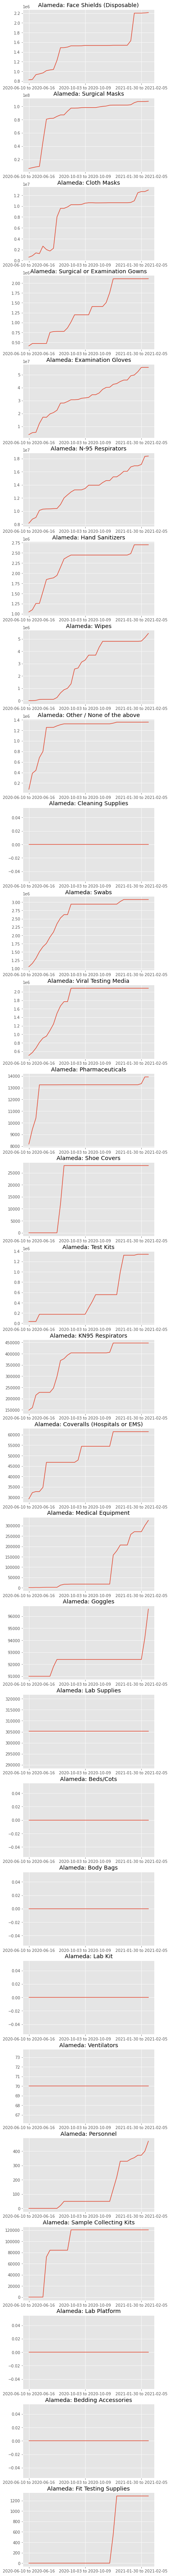

In [17]:
plot_ppe("Alameda")

In [18]:
# create charts for the county and ppe specified, over time
def plot_single(county, ppe):
    county_df = ppe_crunched.loc[ppe_crunched["county"] == county]
    ppe_list = county_df[ppe].tolist()
    fig, ax = plt.subplots()
    ax.plot(week_no, ppe_list)
    ax.set_title(f"{county}: {ppe}")
    ax.set_xticks(week_no[::16])

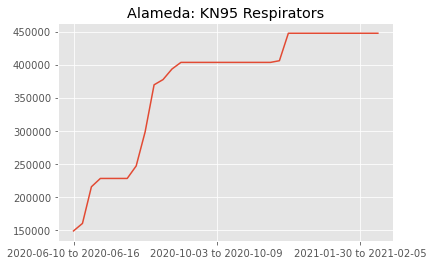

In [19]:
plot_single("Alameda", "KN95 Respirators")

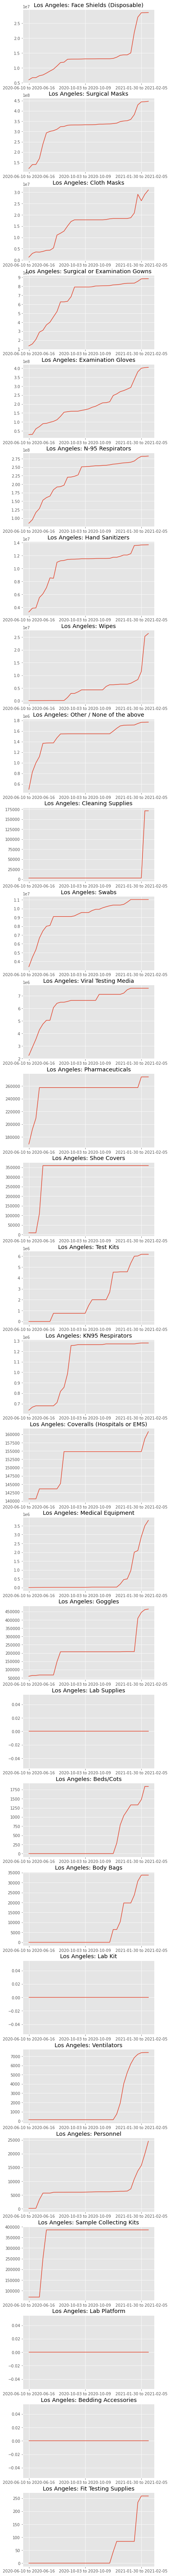

In [20]:
plot_ppe("Los Angeles")

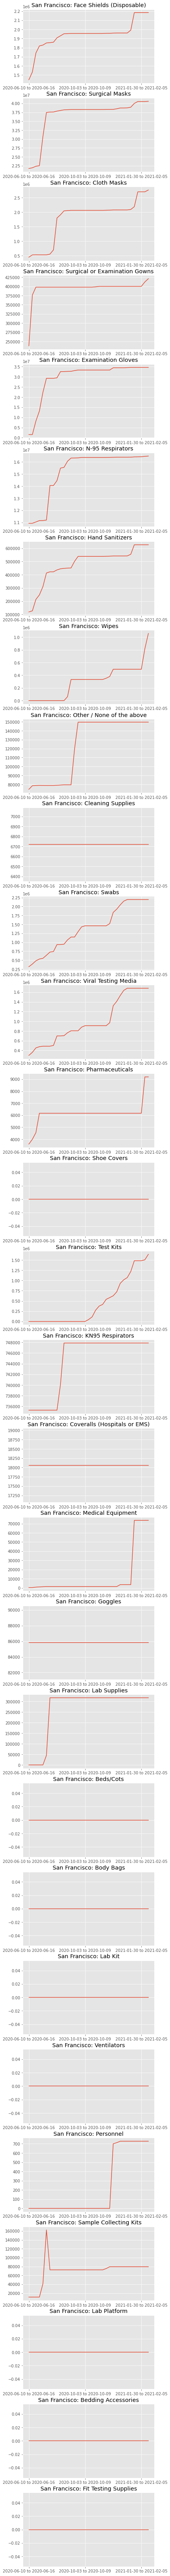

In [21]:
plot_ppe("San Francisco")